# Natural Language Processing NLP

<u>A dataset is from the [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection).</u>
### <u>Introduction:</u>
The main goal of this project was to develop a machine learning model for text classification, specifically for detecting spam in SMS messages. Spam detection is a typical application of Natural Language Processing (NLP) that requires converting unstructured textual data into a numerical representation that can be processed by machine learning algorithms.

In this study, a dataset of over 5,000 SMS messages labeled as "ham" (legitimate) or "spam" was used. The raw text data underwent a series of preprocessing steps, including:

+ slang normalization,

+ punctuation removal,

+ stop word removal,

+ lemmatization.

The cleaned text was then vectorized using the TF-IDF method, allowing the frequency and importance of each word in the corpus to be quantified.

The classification model was trained using a Naive Bayes classifier, which is well-suited for text classification problems due to its probabilistic nature and assumption of feature independence. Both a classical manual approach and a pipeline implementation were applied to ensure proper workflow design and eliminate potential data leakage.

The developed model achieved high accuracy, confirming that even relatively simple models, when combined with well-designed preprocessing, can effectively solve real-world NLP problems such as spam detection.



# <u>1. Libraries</u>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# <u>2. Data import</u>

<u>The file contains a collection of more than **5 thousand SMS phone messages**, file preview:</u>

In [1]:
with open('smsspamcollection/SMSSpamCollection', 'r', encoding='utf-8') as file:
    for i, line in enumerate(file):
        if i >= 20:
            break
        print(line, end='')

# 'r' - file read mode

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
ham	Ok lar... Joking wif u oni...
spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
ham	U dun say so early hor... U c already then say...
ham	Nah I don't think he goes to usf, he lives around here though
spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
ham	Even my brother is not like to speak with me. They treat me like aids patent.
ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
spam	H

<u>We'll use **read_csv** and make note of the **sep** argument, we can also specify the desired column names by passing in a list of *names*:</u>

In [344]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=["label", "message"])
messages.head()
# Our file has 'tab' between label ("ham"/"spam") and message. We'll use tab as separator, we would like to obtain 2 columns "label", "message".

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# <u>3. Preliminary Data Analysis</u>

In [345]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [346]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# <u>4. Data Visualization</u>

<u>Documents length frequency distribution:</u>

(array([1.660e+02, 1.456e+03, 9.990e+02, 6.120e+02, 4.460e+02, 3.010e+02,
        3.180e+02, 4.060e+02, 6.580e+02, 7.300e+01, 2.600e+01, 1.500e+01,
        1.800e+01, 1.200e+01, 5.000e+00, 1.400e+01, 8.000e+00, 9.000e+00,
        5.000e+00, 2.000e+00, 5.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        5.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  2.  ,  20.16,  38.32,  56.48,  74.64,  92.8 , 110.96, 129.12,
        147.28, 165.44, 183.6 , 201.76, 219.92, 238.08, 256.24, 274.4 ,
        292.56, 310.72, 328.88, 347.04, 365.2 , 383.36, 401.52, 419.68,
        437.84, 456.  , 474.16, 492.32, 510.48, 528.64, 546.8 , 564.96,
        583.12, 601.28, 619.44, 637.6 , 655.76, 673.92, 692.08, 710.24,
        728.4 , 

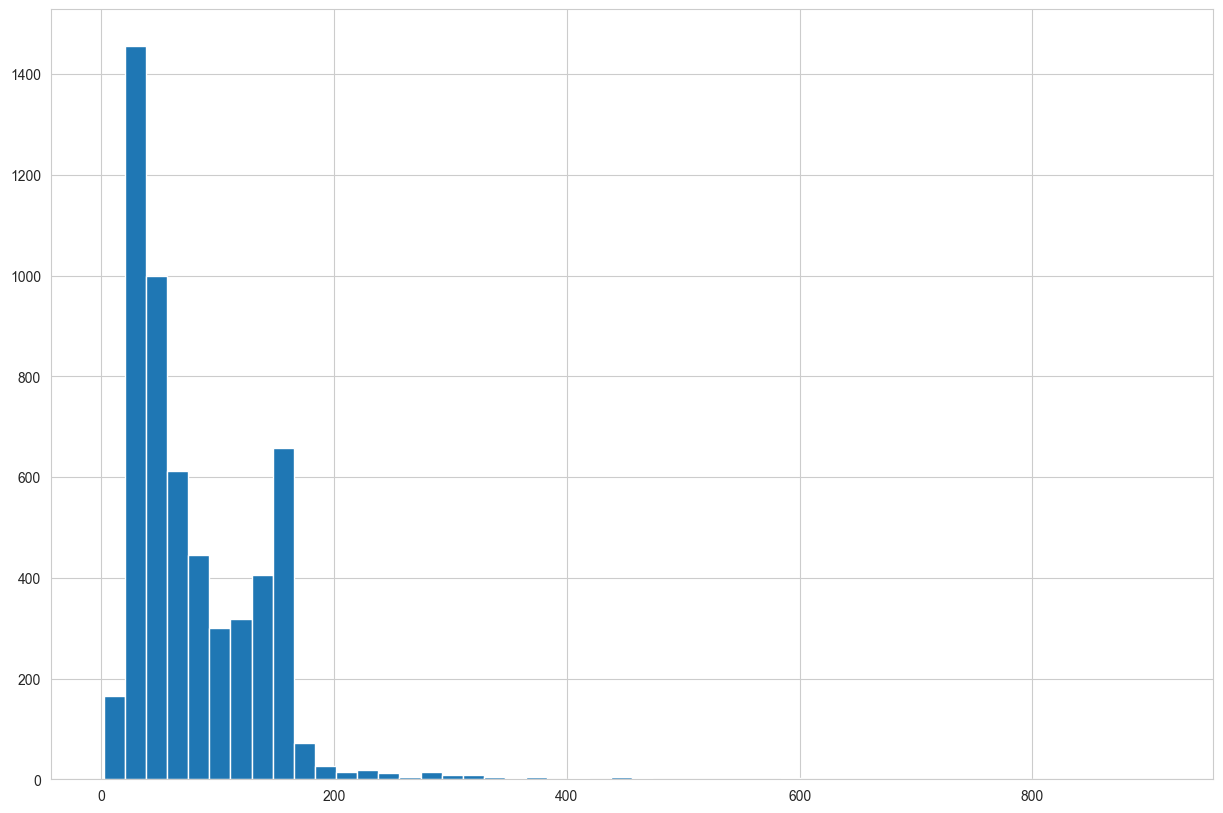

In [347]:
plt.figure(figsize=(15,10))
plt.hist(messages['length'], bins=50)

<u>Additional info:</u>

In [348]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

<u>The longest document has **910** characters, displayed:</u>

In [349]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

<u>Frequency distribution of occurence length messages with distinction to **"Ham"**, **"Spam"**:</u>

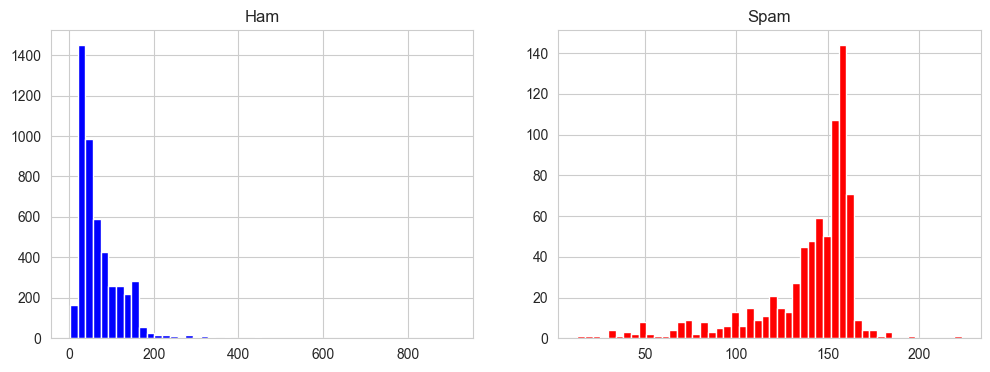

In [350]:
ham = messages[messages['label'] == 'ham']['length']
spam = messages[messages['label'] == 'spam']['length']

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(ham, bins=50, color='blue')
plt.title('Ham')

plt.subplot(1, 2, 2)
plt.hist(spam, bins=50, color='red')
plt.title('Spam')

plt.show()

### <u>Conclusion:<u/>
+ The plot shows that **spam messages** tend to be **longer** than **ham** (non-spam) messages. Most **ham messages** are **short**, with the **majority** concentrated below **50 characters**, while **spam messages** often peak around **150 characters**. This suggests that message length may serve as a helpful feature for spam detection.


+ However, without **deeper analysis**, we cannot rely solely on message length for classification, as other factors such as content, keywords, and context also play a significant role.

# <u>5. Text Normalization & Pre-processing</u>

<u>Text-messages due to the way a lot of people tend to use abbreviations or shorthand, for example:<u/>

    'Nah dawg, IDK! Wut time u headin to da club?'

versus

    'No dog, I don't know! What time are you heading to the club?'

We can build our own dictionaries of **slang** and **abbreviations**.


<u>The electronic documents are **unstructured/semi-structured** and needs to be transformed into a **structured format**.</u>

<u>We **distinguish several** options:<u/>

+ **String** - remove punctuation: '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

+ **Tokenization** - splitting the text into individual units (tokens), such as words, subwords, or punctuation marks.

+ **Stop Words** - a set of words that occur frequently but have little or no meaningful effect (are not significant).

+ **Lematization** - a process of transforming words to their stock form.

+ **Stemming** - alternative to lematization.

There are distinct methods such as **part of speech** tagging.

<u>Our methods will be deployed in a **function**, which will be invoked.<u/>

In [351]:
# Import structured methods
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download libraries
nltk.download('stopwords')  # List of Stop Words
nltk.download('wordnet')    # List of Lemmatization
nltk.download('omw-1.4')    # Synonymes to Lemmatization list

# Preparing our variables
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Slang dictionary
slang_dict = {
    "nah": "no", "dawg": "dog", "dun" : "don't", "idk": "i don't know",
    "wut": "what", "u": "you", "ur": "your", "da": "the", "r": "are",
    "y": "why", "b4": "before", "gr8": "great", "omg": "oh my god",
    "imo": "in my opinion", "imho": "in my humble opinion", "l8r": "later",
    "pls": "please", "plz": "please", "thx": "thanks", "tnx": "thanks",
    "btw": "by the way", "cya": "see you", "brb": "be right back",
    "lol": "laughing out loud", "np": "no problem", "bday": "birthday",
    "msg": "message", "txt": "text", "smh": "shaking my head",
    "ttyl": "talk to you later", "afaik": "as far as I know"
}

# Slang normalization function
def normalize_slang(message):
    message_v = message.lower().split()
    normalized_words = []
    for word in message_v:
        if word in slang_dict:
            normalized_words.extend(slang_dict[word].split())
        else:
            normalized_words.append(word)
    return ' '.join(normalized_words)

# Full text preprocessing function
def text_process(message):

    # Step 1: Normalize slang
    message = normalize_slang(message)

    # Step 2: Punctuation removal
    message_nopunc = ''.join([word for word in message if word not in string.punctuation])

    # Step 3: Tokenization + Stop Words
    message_token = [word for word in message_nopunc.split() if word.lower() not in stop_words]

    # Step 4: Lemmatization
    message_lemmatized = [lemmatizer.lemmatize(word.lower()) for word in message_token]

    return message_lemmatized

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\conce\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\conce\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\conce\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<u>Before vectorization you need to divide our raw data into train and test in order to **avoid data leakage**! <u/>


In [352]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [353]:
from sklearn.model_selection import train_test_split

X, y = messages['message'], messages['label']

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2)

<u>Preprocessing on train/test separately<u/>

In [354]:
X_train_processed = X_train_raw.apply(lambda x: ' '.join(text_process(x)))
X_test_processed = X_test_raw.apply(lambda x: ' '.join(text_process(x)))

1️⃣ X_train_raw to jest pandas Series — zawiera po prostu teksty (wiadomości SMS).

2️⃣ apply(lambda x: ...)

dla każdego elementu (czyli każdego tekstu x) wykonuje funkcję.

3️⃣ W środku lambdy: ' '.join(text_process(x))

text_process(x) → zwraca listę tokenów (czyli ["go", "store", "buy", "milk"]).

' '.join() → łączy te tokeny z powrotem w jeden string "go store buy milk".

Czyli wynik to znowu zwykły string, ale już po pełnym preprocessingu.



<u>The **effect**:<u/>



In [355]:
X_train_processed.head(5).apply(text_process)

5301              [time, come, tomorrow]
4621               [long, fuckin, showr]
4030    […, anyway, many, good, evening]
4580                         [plan, yet]
5523             [going, join, tomorrow]
Name: message, dtype: object

<u>The **original** DataFrame again:<u/>

In [356]:
# Show original dataframe
X_train_raw.head()

5301       At WHAT TIME should i come tomorrow
4621               THIS IS A LONG FUCKIN SHOWR
4030    […] anyway, many good evenings to u! s
4580        No plans yet. What are you doing ?
5523                   Going to join tomorrow.
Name: message, dtype: object

# <u>6. Vectorization<u/>

Now our documents are in a **structured** format. Then we can change our text representation by transforming it into a **numerical** representation. This process is called **vectorization**.

We distinguish simple statistical methods, e.g., **Bag-of-Words** (BoW), **Term Frequency** (TF), and **Term Frequency-Inverse Document Frequency** (TF-IDF).

+ **Bag-of-Words** (BoW) - counting occurence of words (Ti) in document (d0i). Matrix - Ti columns, d0i - rows.

+ **Term Frequency** (TF) - without normalization, it is the same as Bag-of-Words (BoW).

+ **Term Frequency-Inverse Document Frequency** (TF-IDF) - is calculated as Term Frequency multiplied by a weight that reflects how rare the word is across the corpus (all documents) — the rarer the word, the higher its weight.

TF-IDF = TF x IDF,   IDF = ln(N/nj)

<u>Out **structured format** file<u/>

<u>For Train set:<u/>

In [357]:
messages_structured_train = X_train_processed.apply(text_process)
messages_structured_train.head()

5301              [time, come, tomorrow]
4621               [long, fuckin, showr]
4030    […, anyway, many, good, evening]
4580                         [plan, yet]
5523             [going, join, tomorrow]
Name: message, dtype: object

<u>For Test set:<u/>

In [358]:
messages_structured_test = X_test_processed.apply(text_process)
messages_structured_test.head()

1021    [good, afternoon, glorious, anniversary, day, ...
64      [ok, lar, double, check, wif, hair, dresser, a...
4815    [ummmmmaah, many, many, happy, return, day, de...
5535    [know, thinkin, malaria, relax, child, cant, h...
5342    [subscribed, 2, textcomp, 250, wkly, comp, 1st...
Name: message, dtype: object

<u>To vectorization our set shouldb be represented as token, e.q. **['go', 'jurong', ... , 'wat']**. We must transform this set to text, e.q. **go jurong ... wat**<u/>:

In [359]:
messages_ready_train = messages_structured_train.map(' '.join)
messages_ready_train.head()

5301            time come tomorrow
4621             long fuckin showr
4030    … anyway many good evening
4580                      plan yet
5523           going join tomorrow
Name: message, dtype: object

In [360]:
messages_ready_test = messages_structured_test.map(' '.join)
messages_ready_test.head()

1021    good afternoon glorious anniversary day sweet ...
64      ok lar double check wif hair dresser already s...
4815    ummmmmaah many many happy return day dear swee...
5535    know thinkin malaria relax child cant handle m...
5342    subscribed 2 textcomp 250 wkly comp 1st wks fr...
Name: message, dtype: object

<u>The **vectorization** process:<u/>

In [361]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizer object
tfidf_vectorizer = TfidfVectorizer(norm=None, use_idf=True)
tfidf_vectorizer.fit(messages_ready_train)
# Sparse Matrix TF-IDF

X_tfidf_train = tfidf_vectorizer.transform(messages_ready_train)
X_tfidf_test = tfidf_vectorizer.transform(messages_ready_test)

<u>**Sparse Matrix** - only stores non-zero values in our case of IF-IDF matrix:<u/>

In [362]:
print(X_tfidf_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 37361 stored elements and shape (4457, 7848)>
  Coords	Values
  (0, 1970)	4.182099688867489
  (0, 6926)	4.171346897091228
  (0, 6989)	5.153960271896455
  (1, 3079)	8.70930833338587
  (1, 4265)	5.818936575489704
  (1, 6189)	8.70930833338587
  (2, 1070)	6.569242169889598
  (2, 2719)	6.224401683597868
  (2, 3234)	4.249163919448035
  (2, 4428)	5.5738141174567195
  (3, 5304)	5.713576059831878
  (3, 7786)	5.713576059831878
  (4, 3222)	4.519653591359443
  (4, 3912)	6.3114130605874985
  (4, 6989)	5.153960271896455
  (5, 1917)	6.569242169889598
  (5, 2187)	7.323013972265978
  (5, 2723)	5.451211795364387
  (5, 3054)	6.512083756049649
  (5, 3060)	6.694405312843604
  (5, 4790)	8.303843225277705
  (5, 6034)	6.837506156484277
  (5, 6128)	7.610696044717759
  (5, 6129)	8.303843225277705
  (5, 6895)	5.738893867816167
  :	:
  (4453, 1156)	6.224401683597868
  (4453, 2800)	6.917548864157814
  (4453, 3568)	5.618265880027553
  (4453, 4202)	4.1929

In [363]:
print(X_tfidf_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8317 stored elements and shape (1115, 7848)>
  Coords	Values
  (0, 869)	7.099870420951769
  (0, 924)	6.224401683597868
  (0, 2045)	6.763398184330556
  (0, 2240)	4.1984488268690185
  (0, 2901)	5.324918070040095
  (0, 3234)	4.249163919448035
  (0, 3382)	5.139775636904499
  (0, 3548)	4.948108217692306
  (0, 3682)	8.70930833338587
  (0, 4017)	6.144358975924332
  (0, 5481)	8.70930833338587
  (0, 6026)	6.763398184330556
  (0, 6065)	4.405243240181699
  (0, 6698)	6.001258132283659
  (0, 6780)	8.016161152825923
  (0, 6881)	4.590271158573397
  (1, 997)	5.098390420741644
  (1, 1817)	5.936719611146088
  (1, 2186)	14.41046187321919
  (1, 2491)	6.569242169889598
  (1, 2518)	8.303843225277705
  (1, 3348)	6.569242169889598
  (1, 4104)	6.144358975924332
  (1, 4268)	5.905947952479334
  (1, 4834)	5.618265880027553
  :	:
  (1111, 1962)	6.224401683597868
  (1111, 2042)	5.259320787554281
  (1111, 5500)	5.111996072797423
  (1111, 6536)	4.666257065

# <u>7. Machine Learning<u/>

# <u>7.1. Choosing the Model<u/>

Our corpus is now represented numerically as a TF-IDF matrix. Then, we can use machine learning **classification algorithms** (e.g., for spam/ham classification) to train our model. For example, we can choose a **Naive Bayes classifier**.

### <u>How Naive Bayes Classifier Works - Principle of Operation<u/>

A naive Bayes classifier is based on probability theory. Its job is to calculate how closely the input data (e.g. text) fits into each of the possible classes (e.g. spam or ham), and assign it to the class that has the highest probability.

+ **<u>Step 1 - a priori knowledge<u/>**

At first, the algorithm uses knowledge about how often individual classes appear in the entire data set.

For example:

80% of messages are "ham" (normal),

20% of messages are "spam".

These are the so-called a priori probabilities — meaning that there is a higher chance that our input belongs to the 'ham' class.

e.q.

P(green) = 40/60

P(red) = 20/60

+ **<u>Step 2 - feature analysis<u/>**

Then the algorithm analyzes the features of the message, i.e. the occurrence of specific words.

For each class, it counts how often a given word appears in this class. For example:

The word "free" appears in 60% of spam messages, but only in 5% of normal messages.

Based on these statistics, it estimates how much the presence of a given word speaks for one or the other class.

e.q.

P(X|green) = 1/40

P(X|red) = 3/20

+ **<u>Step 3 - Calculating the posterior probability<u/>**

The algorithm combines:

prior knowledge about the frequency of classes (a priori),

and feature analysis (the probability of words in a given class),

to calculate the so-called posterior probability — that is, what is the chance that this particular message belongs to a given class, taking into account its content.

e.q.

P(green|X)=P(green)*P(X|green) = 1/60

P(red|X)=P(red)*P(X|red) = 1/20

+ **<u>Step 4 - Decision<u/>**

Finally, the algorithm selects the class for which this posterior probability is the highest.
That is, to which class does a given message "fit" best according to the calculations.

e.q.

P(green|X) < P(red|X) -> assign to class red

+ **<u>Why is it Bayesian inference and why naive?<u/>**

Because it does exactly what Bayes' theorem does:

It takes the prior probabilities of the classes (how often the classes appear in the set).

It updates this knowledge based on the data (the words in the message) and calculates the posterior probability — the chance that a given input belongs to a given class.

Finally, it chooses the class with the highest posterior probability.

It assumes independence of features — this is the main difference between "true" Bayesian inference and Naive Bayes.

# <u>7.2. Building the Model<u/>




In [364]:
X_train = X_tfidf_train
X_test = X_tfidf_test
y_train = y_train   # We defined it earlier
y_test = y_test     # We defined it earlier

In [365]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB()
spam_detect_model.fit(X_train, y_train)

MultinomialNB()

# <u>7.3. Evaluation<u/>

<u>Model evaluation - ability of correct predictions<u/>

In [366]:
y_pred=spam_detect_model.predict(X_test)

<u>Metrics - accuracy<u/>

In [367]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9704035874439462


<u>Metrics - confusion matrix<u/>

In [368]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[953  25]
 [  8 129]]


<u>Metrics - classification report<u/>

In [369]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.97      0.98       978
        spam       0.84      0.94      0.89       137

    accuracy                           0.97      1115
   macro avg       0.91      0.96      0.93      1115
weighted avg       0.97      0.97      0.97      1115



<u>It's better to let some spam through than to block valid messages. That's why the precision metric is more important here - avoiding false positives.<u/>

# <u>8. Pipeline<u/>


**<u>What is a pipeline for?<u/>**

In ML, we usually have several stages of data processing:

+ preprocessing (text cleaning, tokenization)

+ vectorization (CountVectorizer, TF-IDF)

+ transformations (scaling, normalization, etc.)

+ model (classifier)

A pipeline allows you to pack all these steps together into one object that works as a whole.

**<u>Why it's convenient:<u/>**

+ You can process data with one .fit() and .predict() - you don't have to remember to do preprocessing and vectorization separately yourself.

+ Everything happens in the right order.

+ It ensures no "data leakage" during train/test split or cross-validation.

+ It's easier to do things like GridSearch and hyperparameter tuning.

In [ ]:
import numpy as np
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Preprocessing setup
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

slang_dict = {
    "nah": "no", "dawg": "dog", "dun": "don't", "idk": "i don't know",
    "wut": "what", "u": "you", "ur": "your", "da": "the", "r": "are",
    "y": "why", "b4": "before", "gr8": "great", "omg": "oh my god",
    "imo": "in my opinion", "imho": "in my humble opinion", "l8r": "later",
    "pls": "please", "plz": "please", "thx": "thanks", "tnx": "thanks",
    "btw": "by the way", "cya": "see you", "brb": "be right back",
    "lol": "laughing out loud", "np": "no problem", "bday": "birthday",
    "msg": "message", "txt": "text", "smh": "shaking my head",
    "ttyl": "talk to you later", "afaik": "as far as I know"
}

def normalize_slang(message):
    message_v = message.lower().split()
    normalized_words = []
    for word in message_v:
        if word in slang_dict:
            normalized_words.extend(slang_dict[word].split())
        else:
            normalized_words.append(word)
    return ' '.join(normalized_words)

def text_process(message):
    message = normalize_slang(message)
    message_nopunc = ''.join([word for word in message if word not in string.punctuation])
    message_token = [word for word in message_nopunc.split() if word.lower() not in stop_words]
    message_lemmatized = [lemmatizer.lemmatize(word.lower()) for word in message_token]
    return message_lemmatized

# Wczytanie danych
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=["label", "message"])

# Podział na train/test na surowych danych
X = messages['message']
y = messages['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(analyzer=text_process)),  # tu podajemy funkcję preprocessing
    ('tfidf', TfidfTransformer(norm=None, use_idf=True)),
    ('classifier', MultinomialNB())
])

# Fit modelu na train
pipeline.fit(X_train, y_train)

# Predykcja na test
y_pred = pipeline.predict(X_test)

# Ewaluacja
print(classification_report(y_test, y_pred))

### <u>Conclusions:</u>

The results obtained using both the classical manual approach and the Pipeline implementation were identical. This indicates that the complete preprocessing and vectorization logic was successfully preserved and correctly integrated into the pipeline workflow.

The classification model achieved high performance with an accuracy of approximately 97%.

The recall for the spam class remained high, which is critical in spam detection, as most spam messages were correctly identified.

The precision for spam slightly decreased compared to ham, which reflects a small number of false positives — acceptable in typical spam filtering applications.

The pipeline not only simplifies the code but also ensures better maintainability, reproducibility, and prevents data leakage by encapsulating the entire processing flow.

In summary, the pipeline implementation validated the correctness of the preprocessing logic and provides a cleaner and more robust solution for text classification tasks.

